# 7. Feature Selection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./dataset/train_ts_feature_added.csv')
df_train['datetime_iso'] = pd.to_datetime(df_train['datetime_iso'])

df_test = pd.read_csv('./dataset/test_ts_feature_added.csv')
df_test['datetime_iso'] = pd.to_datetime(df_test['datetime_iso'])

In [3]:
df_train = df_train.drop(['datetime_iso'],axis = 1)
df_test = df_test.drop(['datetime_iso'],axis = 1)

## Correlation Analysis

<Figure size 1200x800 with 0 Axes>

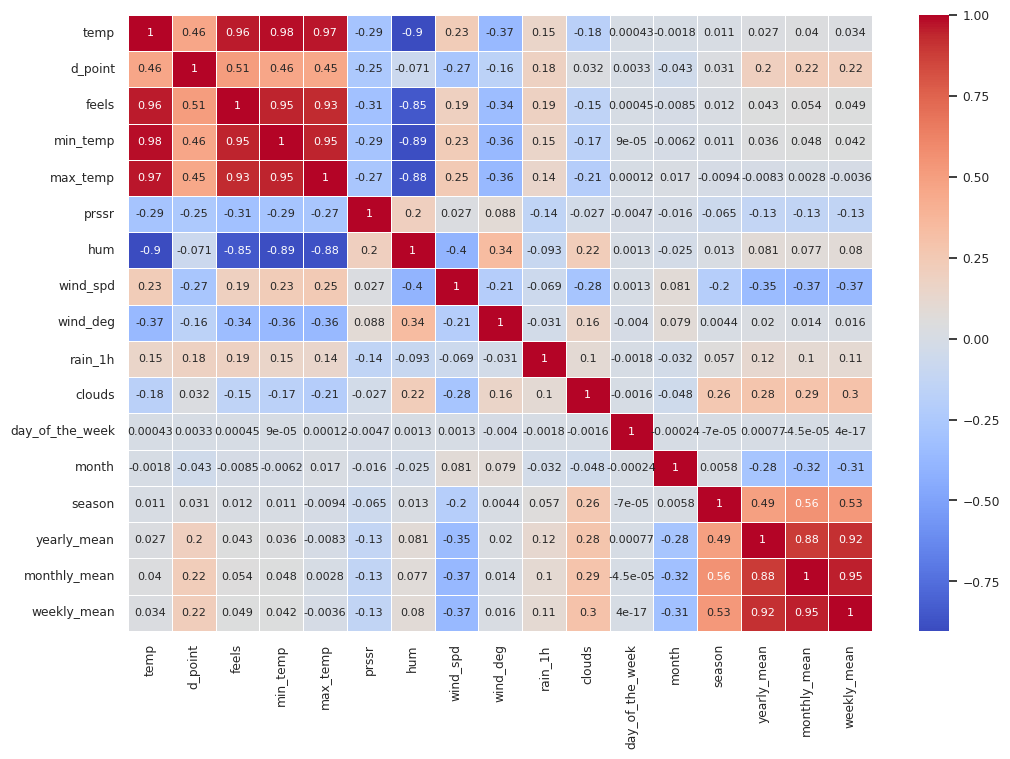

In [5]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Customize the heatmap appearance and font size
sns.set(font_scale=0.8)  # Adjust the font scale as needed
sns.set_style("whitegrid")

# Create the heatmap with smaller annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": 8})  # Adjust the "size" parameter for the font size

# Show the plot
plt.show()

### Coba drop day_of_the_week deh

In [6]:
df_train_dotw = df_train.drop(['day_of_the_week'],axis = 1)
df_test_dotw = df_train.drop(['day_of_the_week'],axis = 1)

In [7]:
from pycaret.regression import *
s = setup(df_train_dotw, target = 'rain_1h', session_id = 42)

,Description,Value
0,Session id,42
1,Target,rain_1h
2,Target type,Regression
3,Original data shape,"(341880, 16)"
4,Transformed data shape,"(341880, 16)"
5,Transformed train set shape,"(239315, 16)"
6,Transformed test set shape,"(102565, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [8]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4464,0.7432,0.8621,0.1473,0.3667,1.2036
1,0.4485,0.7485,0.8652,0.1576,0.3668,1.1910
2,0.4529,0.7594,0.8714,0.1504,0.3687,1.2278
3,0.4516,0.7942,0.8912,0.1543,0.3681,1.2120
4,0.4466,0.7555,0.8692,0.1523,0.3658,1.1885
5,0.4468,0.7838,0.8853,0.1566,0.3665,1.1938
6,0.4432,0.7324,0.8558,0.1548,0.3646,1.2132
7,0.4474,0.7488,0.8653,0.1417,0.3688,1.2204
8,0.4441,0.7429,0.8619,0.1576,0.3646,1.1978
